In [35]:
# Import libraries:
import numpy as np
from matplotlib import pyplot as plt
import math
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation

In [36]:
# Directories:
dir = 'Yuri-David-File/'
fig_dir = 'Figures/'

In [37]:
# RF period (325 MHz frequency):
T = 1/(325*10**6)*10**9 # ns

# Load data from output txt files:
initial_data = np.loadtxt(dir+'out1.txt')
final_data = np.loadtxt(dir+'out31.txt')

In [38]:
# Values for inital detector:
xi = []; yi = []; zi = []
pxi = []; pyi = []; pzi = []; ptotali = []
ti = []; mod_ti = []
for i in range(initial_data.shape[0]):
    xi.append(initial_data[i][0]/10) # mm -> cm
    yi.append(initial_data[i][1]/10)
    zi.append(initial_data[i][2]/10)
    px = initial_data[i][3]; py = initial_data[i][4]; pz = initial_data[i][5]
    pxi.append(px) # MeV/c
    pyi.append(py)
    pzi.append(pz)
    ptotali.append(np.sqrt(px**2+py**2+pz**2))
    # ptotali.append(np.sqrt(px**2+py**2))
    t = initial_data[i][6]
    ti.append(t) # ns
    mod_t = t % T
    mod_ti.append(mod_t)
    # if mod_t > T/2:
    #     mod_ti.append(mod_t-3.0)
    # else:
    #     mod_ti.append(mod_t)
    del px, py, pz, t

In [39]:
# Values for final detector:
xf = []; yf = []; zf = []
pxf = []; pyf = []; pzf = []; ptotalf = []
tf = []; mod_tf = []
for i in range(final_data.shape[0]):
    xf.append(final_data[i][0]/10) # mm -> cm
    yf.append(final_data[i][1]/10)
    zf.append(final_data[i][2]/10)
    px = final_data[i][3]; py = final_data[i][4]; pz = final_data[i][5]
    pxf.append(px) # MeV/c
    pyf.append(py)
    pzf.append(pz)
    ptotalf.append(np.sqrt(px**2+py**2+pz**2))
    # ptotalf.append(np.sqrt(px**2+py**2))
    t = final_data[i][6]
    tf.append(t) # ns
    mod_t = t % T
    mod_tf.append(mod_t)
    # if mod_t > T/2:
    #     mod_tf.append(mod_t-3.0)
    # else:
    #     mod_tf.append(mod_t)
    del px, py, pz, t

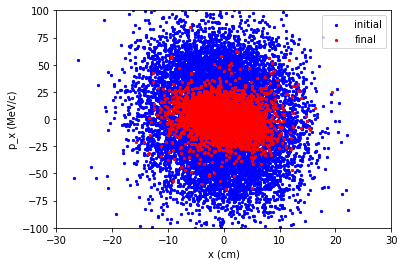

In [22]:
# Plot px vs x:
point_size = 5
plt.scatter(xi,pxi,color='blue',label='initial',s=point_size)
plt.scatter(xf,pxf,color='red',label='final',s=point_size)
plt.xlim(-30,30)
plt.ylim(-100,100)
plt.xlabel('x (cm)')
plt.ylabel('p_x (MeV/c)')
plt.legend()
plt.savefig(fig_dir+'px_vs_x.png',dpi=300)

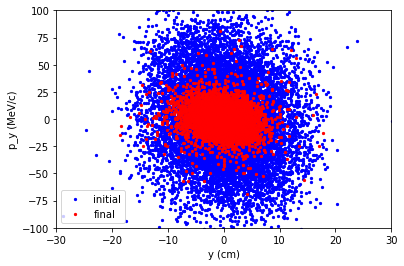

In [23]:
# Plot py vs y:
plt.scatter(yi,pyi,color='blue',label='initial',s=point_size)
plt.scatter(yf,pyf,color='red',label='final',s=point_size)
plt.xlim(-30,30)
plt.ylim(-100,100)
plt.xlabel('y (cm)')
plt.ylabel('p_y (MeV/c)')
plt.legend()
plt.savefig(fig_dir+'py_vs_y.png',dpi=300)

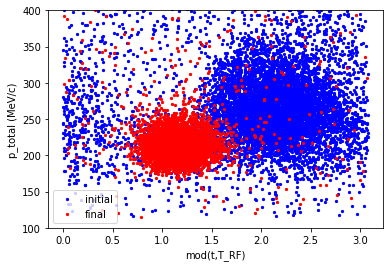

In [24]:
# Plot total p vs t:
plt.scatter(mod_ti,ptotali,color='blue',label='initial',s=point_size)
plt.scatter(mod_tf,ptotalf,color='red',label='final',s=point_size)
plt.ylim(100,400)
plt.xlabel('mod(t,T_RF)')
plt.ylabel('p_total (MeV/c)')
plt.legend()
plt.savefig(fig_dir+'ptotal_vs_t.png',dpi=300)

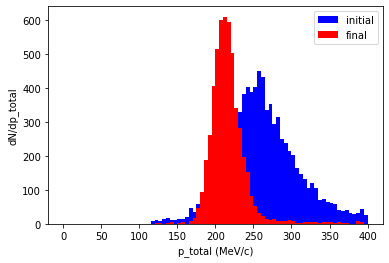

In [25]:
# Plot total p distribution:
plt.hist(ptotali,color='blue',label='initial',range=(0,400),bins=80) # bins of 5
plt.hist(ptotalf,color='red',label='final',range=(0,400),bins=80)
plt.xlabel('p_total (MeV/c)')
plt.ylabel('dN/dp_total')
plt.legend()
plt.savefig(fig_dir+'ptotal_distribution.png',dpi=300)

In [26]:
# Compute beam loss down channel:
loss = 1 - len(ptotalf)/len(ptotali)
print(loss)

0.5559521832973602


In [40]:
# Values for all detectors:
x_vals = []; y_vals = []; z_vals = []
px_vals = []; py_vals = []; pz_vals = []
t_vals = []; position = []
for j in range(31):

    # Load data from output txt files:
    data = np.loadtxt(dir+'out'+str(j+1)+'.txt')

    # Values for each detector:
    x = []; y = []; z = []
    px = []; py = []; pz = []
    t = []
    for i in range(data.shape[0]):
        x.append(data[i][0]/10) # mm -> cm
        y.append(data[i][1]/10)
        z.append(data[i][2]/10)
        px.append(data[i][3]) # MeV/c
        py.append(data[i][4])
        pz.append(data[i][5])
        t.append(data[i][6]) # ns

    # Values for entire channel:
    x_vals.append(x)
    y_vals.append(y)
    z_vals.append(z)
    px_vals.append(px)
    py_vals.append(py)
    pz_vals.append(pz)
    t_vals.append(t)
    position.append(z[0]/100) # cm -> m

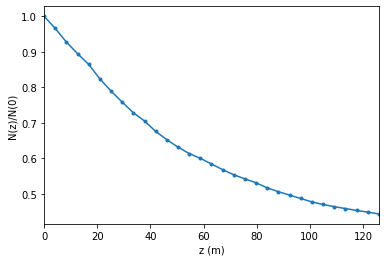

In [41]:
# Plot transmission rate along z:
position = position - min(position) # set first detector to z=0 (actually starts after one period)
plt.plot(position,[(len(i)/len(x_vals[0])) for i in x_vals],marker='.')
# plt.ylim(0,1)
plt.xlim(0,max(position))
plt.xlabel('z (m)')
plt.ylabel('N(z)/N(0)')
plt.savefig(fig_dir+'transmission_rate.png',dpi=300)

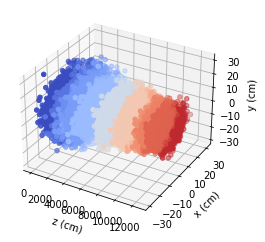

In [29]:
# 3D plot of x, y distribution at each detector:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
cmap = plt.get_cmap('coolwarm')
for i in range(len(position)):
    color = cmap(i/len(position))
    ax.scatter(position[i]*100,x_vals[i],y_vals[i],color=color) # position m -> cm
ax.set_xlabel('z (cm)')
ax.set_ylabel('x (cm)')
ax.set_zlabel('y (cm)')
plt.savefig(fig_dir+'3D_scatter.png',dpi=300)

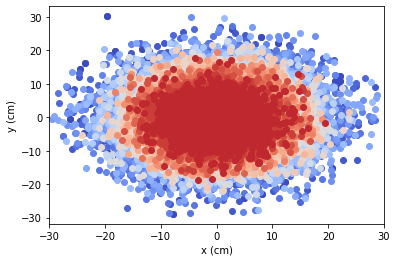

In [30]:
# Animation of x, y distribution along channel:
fig, ax = plt.subplots()
cmap = plt.get_cmap('coolwarm')
def animate(frame):
    color = cmap(frame/len(position))
    ax.scatter(x_vals[frame],y_vals[frame],color=color)  # position m -> cm
    ax.set_xlabel('x (cm)')
    ax.set_ylabel('y (cm)')
    ax.set_xlim(-30,30)
animation = FuncAnimation(fig, animate, frames=len(position), interval=400, repeat=True)
animation.save(fig_dir+'scatter_animation.gif', writer='pillow')

In [58]:
##### WITH LIMITED RANGE OF P VALUES #####

# Values for all detectors:
x_vals = []; y_vals = []; z_vals = []
px_vals = []; py_vals = []; pz_vals = []
ptotal_vals = []
t_vals = []; position = []
for j in range(31):

    # Load data from output txt files:
    data = np.loadtxt(dir+'out'+str(j+1)+'.txt')

    # Values for each detector:
    x = []; y = []; z = []
    px = []; py = []; pz = []
    ptotal = []
    t = []
    for i in range(data.shape[0]):
        px_val = data[i][3]; py_val = data[i][4]; pz_val = data[i][5]
        ptotal_val = np.sqrt(px_val**2+py_val**2+pz_val**2)
        if 0 < ptotal_val < 400:
            x.append(data[i][0]/10) # mm -> cm
            y.append(data[i][1]/10)
            z.append(data[i][2]/10)
            px.append(px_val) # MeV/c
            py.append(py_val)
            pz.append(pz_val)
            ptotal.append(ptotal_val)
            t.append(data[i][6]) # ns

    # Values for entire channel:
    x_vals.append(x)
    y_vals.append(y)
    z_vals.append(z)
    px_vals.append(px)
    py_vals.append(py)
    pz_vals.append(pz)
    ptotal_vals.append(ptotal)
    t_vals.append(t)
    position.append(z[0]/100) # cm -> m

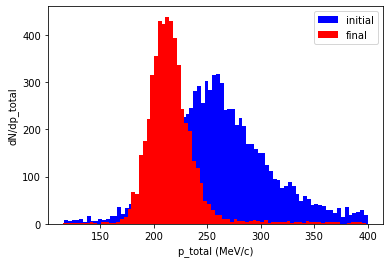

In [59]:
##### WITH LIMITED RANGE OF P VALUES #####

# Plot total p distribution:
ptotali = ptotal_vals[0]
ptotalf = ptotal_vals[len(ptotal_vals)-1]
plt.hist(ptotali,color='blue',label='initial',bins=80) # bins of 5
plt.hist(ptotalf,color='red',label='final',bins=80)
plt.xlabel('p_total (MeV/c)')
plt.ylabel('dN/dp_total')
plt.legend()

Final transmission rate (paper): 0.67750449910018
Final transmission rate (simulation): 0.6351516634050881


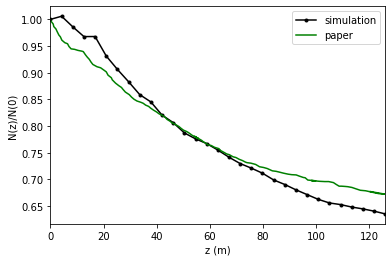

In [66]:
##### WITH LIMITED RANGE OF P VALUES #####

# Load transmission rate data from paper:
data = np.genfromtxt('paper_transmission_rate_data.csv',delimiter=',')
data_x = []; data_y = []
for i in range(len(data)):
    data_x.append(data[i][0])
    data_y.append(data[i][1])

transmission_rate_paper = data_y[len(data_y)-1]/data_y[0]
print('Final transmission rate (paper): '+str(transmission_rate_paper))

# Plot transmission rate along z:
position = position - min(position) # set first detector to z=0 (actually starts after one period)
plt.plot(position,[(len(i)/len(x_vals[0])) for i in x_vals],marker='.',color='black',label='simulation')
plt.plot(data_x,data_y,color='green',label='paper')
# plt.ylim(0,1)
plt.xlim(0,max(position))
plt.legend()
plt.xlabel('z (m)')
plt.ylabel('N(z)/N(0)')
plt.savefig(fig_dir+'transmission_rate_limited_ptotal.png',dpi=300)

transmission_rate_sim = len(x_vals[len(x_vals)-1])/len(x_vals[0])
print('Final transmission rate (simulation): '+str(transmission_rate_sim))